<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Ass_09Association_Rules(book).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import liabraries**

In [1]:
import mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

# **Read CSA File**

In [5]:
book = pd.read_csv('/content/book.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **EDA**

In [4]:
book.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [6]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
book.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2000, 11)

### Cheaking null values

In [8]:
book.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [9]:
book.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Apriori Algorithm**

**Associations Rule with 0.10% support and 0.70% confidence interval**

In [10]:
frequent_itemsets = apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


# **Rules**

In [13]:
rules=association_rules(frequent_itemsets,metric = 'lift' ,min_threshold=0.7)
rules
rules.sort_values('lift',ascending=False)[:20]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298


In [14]:
rules[rules.lift>1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


# **Scatter plot Between Support Vs Confidance**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


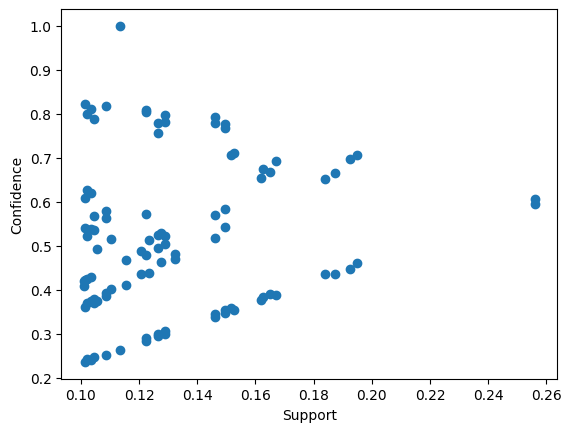

In [15]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()